**Importing Libraries**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Importing Machine Learning Models**

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

**Splitting and Searching**

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

**Evaluation Metrics**

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay

**Loading the Dataset**

In [47]:
df = pd.read_csv('/content/heart-disease.csv')

In [48]:
df.shape

(303, 14)

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
df['target'].value_counts()

,count
target,
1,165
0,138


<ipython-input-51-eac9f7f0a3a6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette=["salmon", "lightblue"], edgecolor="black")


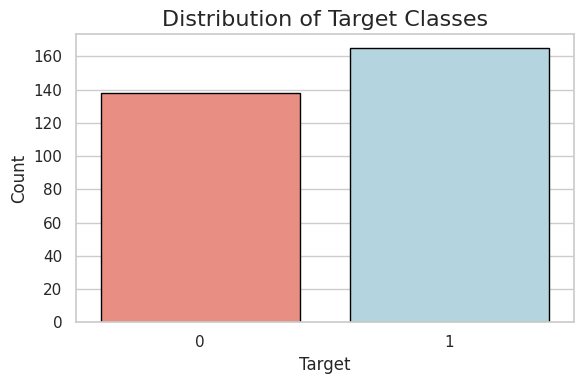

In [51]:
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")

sns.countplot(x="target", data=df, palette=["salmon", "lightblue"], edgecolor="black")

plt.title("Distribution of Target Classes", fontsize=16)
plt.xlabel("Target", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [52]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [53]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


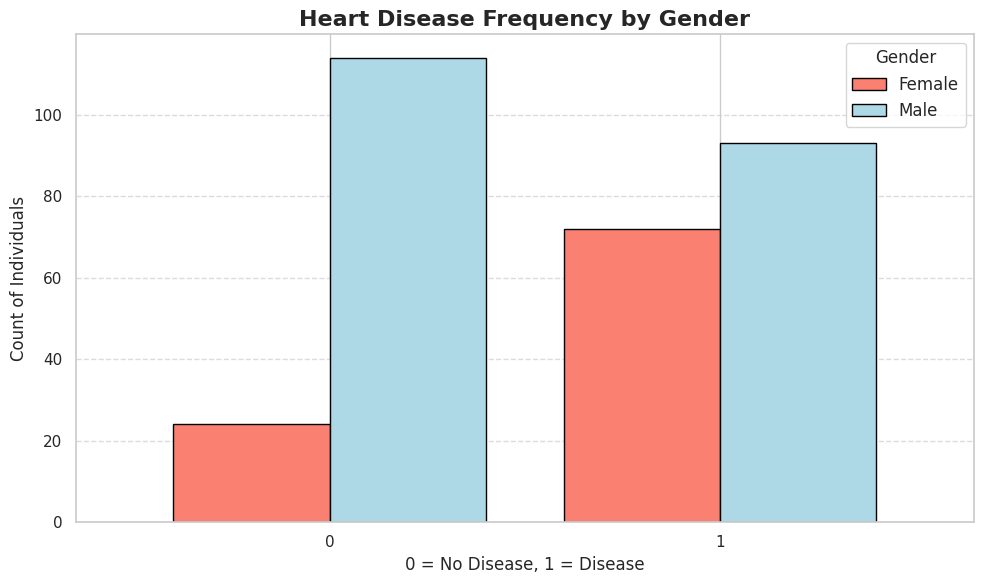

In [54]:
heart_disease_by_sex = pd.crosstab(df.target, df.sex)

heart_disease_by_sex.plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"], width=0.8, edgecolor="black")

plt.title("Heart Disease Frequency by Gender", fontsize=16, fontweight='bold')
plt.xlabel("0 = No Disease, 1 = Disease", fontsize=12)
plt.ylabel("Count of Individuals", fontsize=12)
plt.legend(["Female", "Male"], title="Gender", loc="upper right", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [55]:
df["thalach"].value_counts()

,count
thalach,
162,11
160,9
163,9
152,8
173,8
...,...
202,1
184,1
121,1


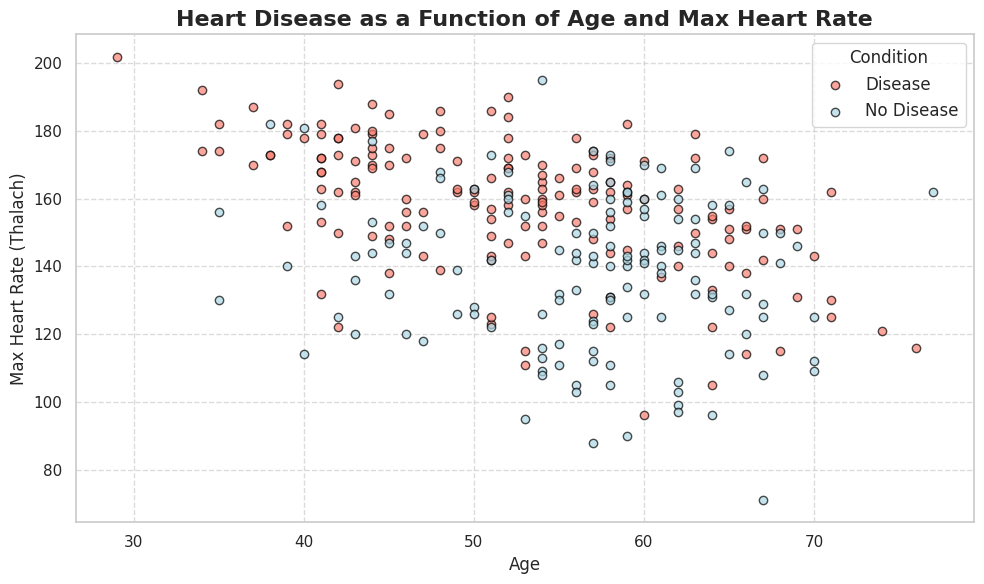

In [56]:
plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color="salmon", edgecolor="black", alpha=0.7)
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color="lightblue", edgecolor="black", alpha=0.7)

plt.title("Heart Disease as a Function of Age and Max Heart Rate", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Max Heart Rate (Thalach)", fontsize=12)

plt.legend(["Disease", "No Disease"], title="Condition", loc="upper right", fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.show()

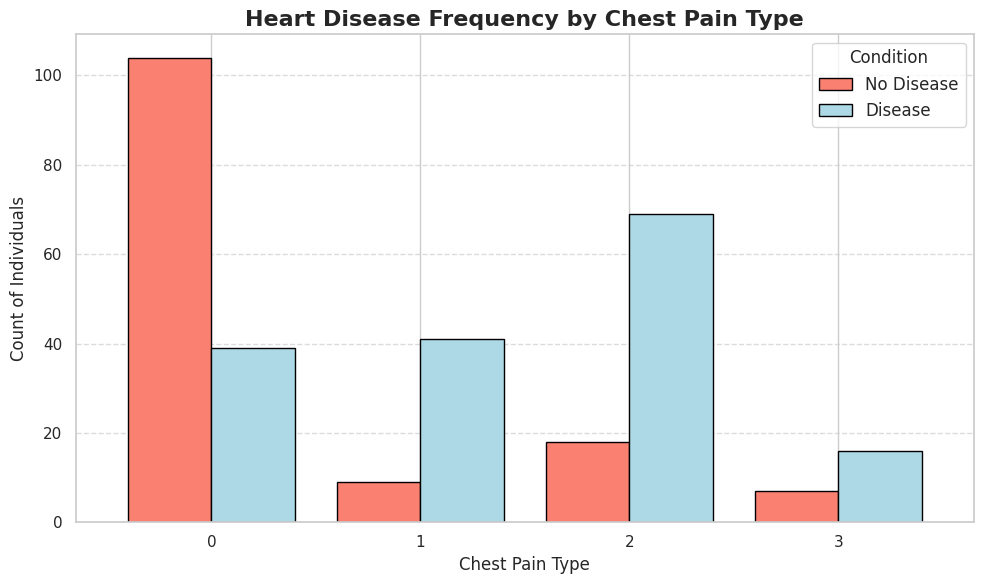

In [57]:
pd.crosstab(df.cp, df.target).plot(
    kind="bar",
    figsize=(10, 6),
    color=["salmon", "lightblue"],
    width=0.8,
    edgecolor="black"
)

plt.title("Heart Disease Frequency by Chest Pain Type", fontsize=16, fontweight='bold')
plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Count of Individuals", fontsize=12)
plt.legend(["No Disease", "Disease"], title="Condition", loc="upper right", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

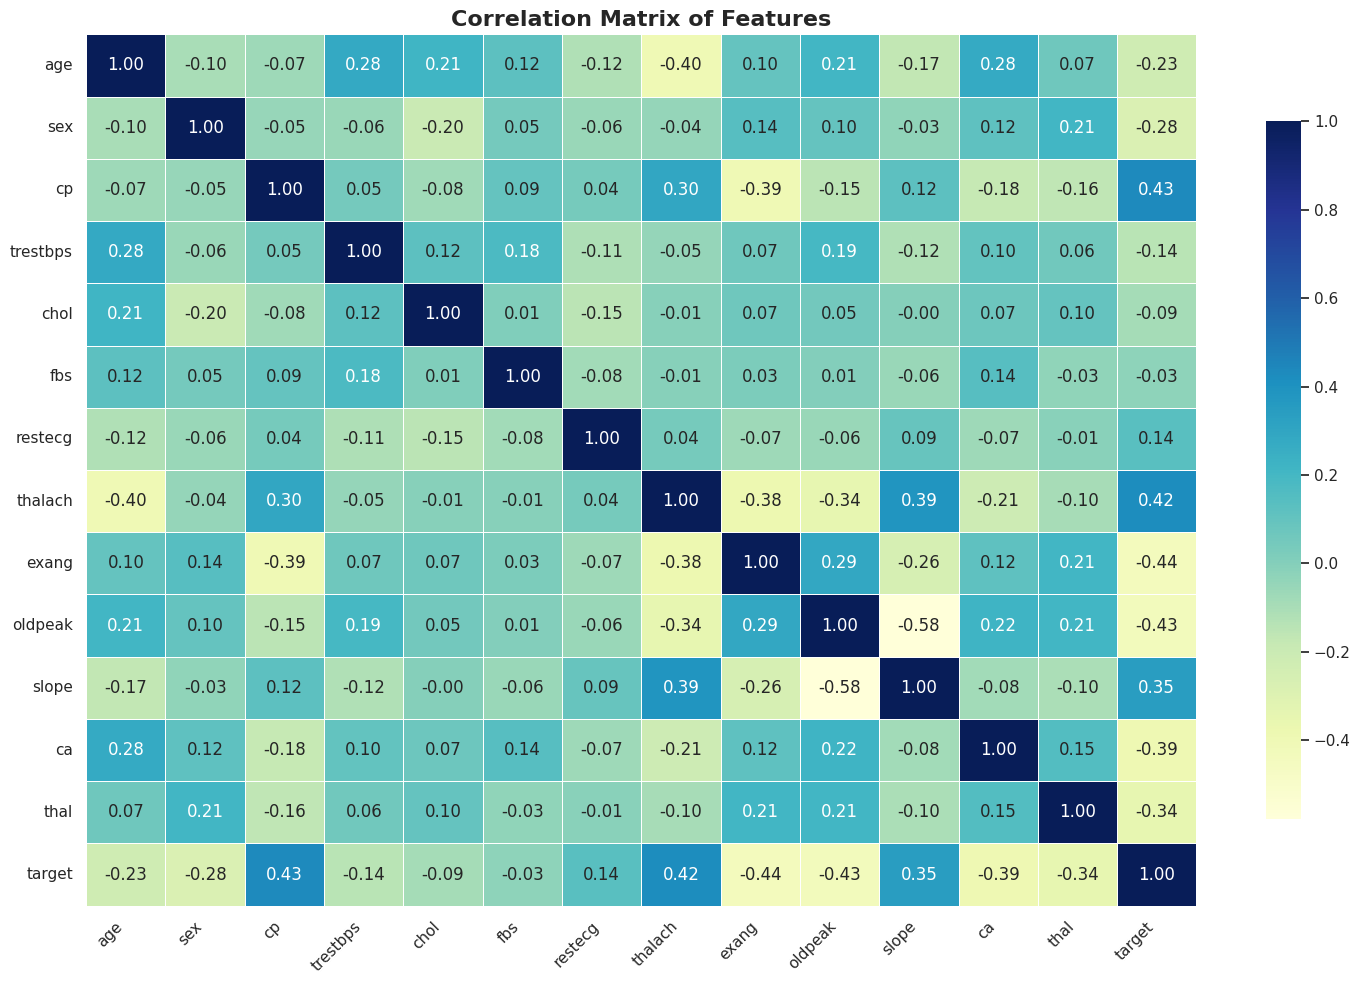

In [58]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    linewidths=0.5,
    fmt=".2f",
    cmap="YlGnBu",
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix of Features", fontsize=16, fontweight='bold')
plt.xticks(fontsize=11, rotation=45, ha='right')
plt.yticks(fontsize=11)
plt.tight_layout()

plt.show()


In [59]:
x = df.drop("target",axis=1)
y = df["target"]

In [60]:
np.random.seed(42)

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [61]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [62]:
y_train

,target
132,1
202,0
196,0
75,1
176,0
...,...
188,0
71,1
106,1
270,0


In [63]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


* Logistic regression
* K-Nearest Neighboours Classifier
* Random Forest Classifier

In [64]:
models = {
    "Logistics Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [65]:
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)  # Train the model
        model_scores[name] = model.score(x_test, y_test)  # Evaluate the model
    return model_scores

In [66]:
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistics Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<Figure size 1000x600 with 0 Axes>

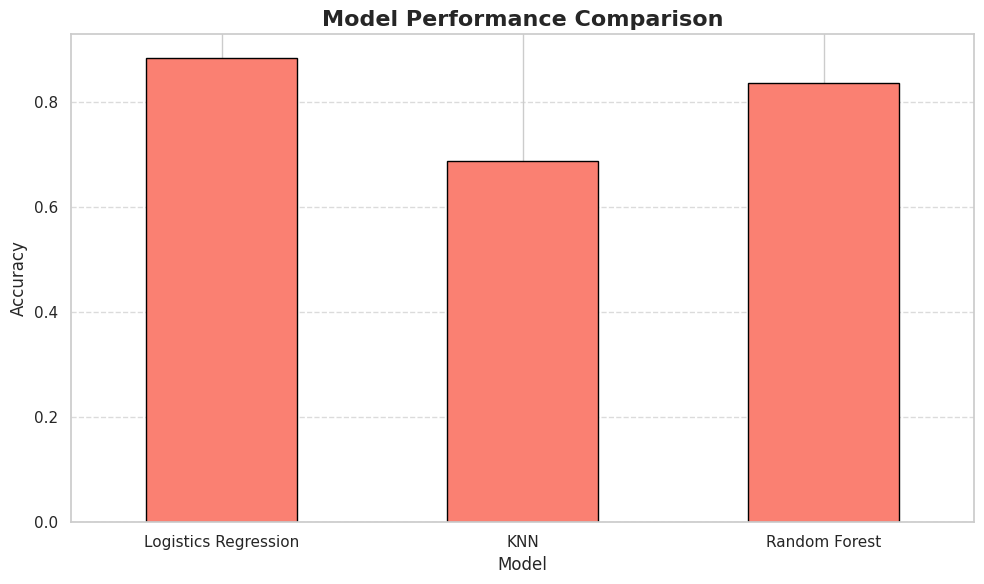

In [67]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])

plt.figure(figsize=(10, 6))
model_compare.T.plot.bar(
    figsize=(10, 6),
    color=["salmon", "lightblue", "lightgreen"],
    edgecolor="black",
    legend=False
)

plt.title("Model Performance Comparison", fontsize=16, fontweight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

* hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-Validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve
* Area under the curve (AUC)




**hyperparameter tuning**

In [68]:
train_scores = []
test_scores = []
neighbors = range(1, 21)
knn = KNeighborsClassifier()

In [69]:
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [70]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

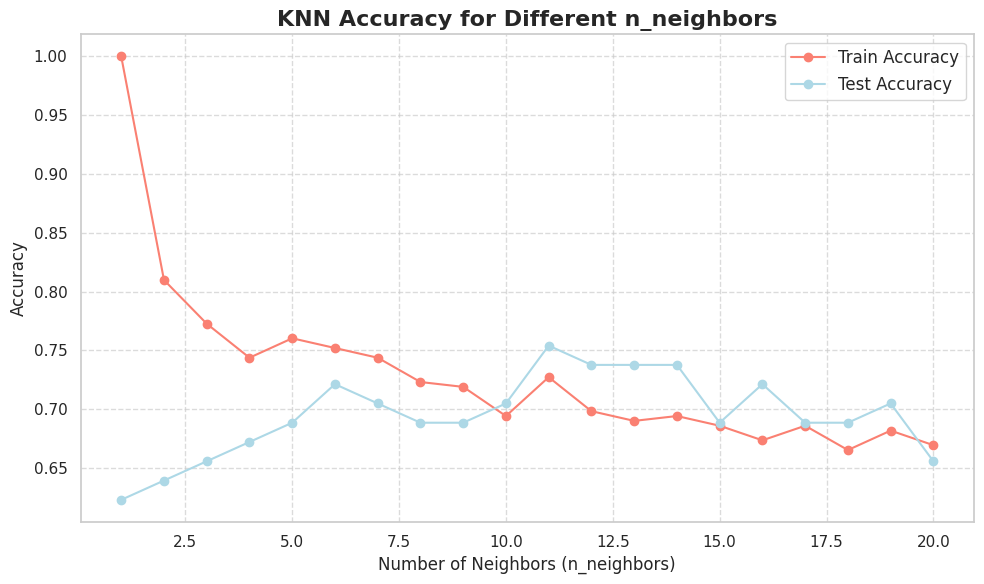

In [71]:
plt.figure(figsize=(10, 6))

plt.plot(neighbors, train_scores, label="Train Accuracy", color="salmon", marker="o")
plt.plot(neighbors, test_scores, label="Test Accuracy", color="lightblue", marker="o")

plt.title("KNN Accuracy for Different n_neighbors", fontsize=16, fontweight='bold')
plt.xlabel("Number of Neighbors (n_neighbors)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

**hyperparameter tuning randomizedsearchCV**

In [72]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

In [73]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [74]:
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [75]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    verbose=True
)

rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [76]:
print(rs_log_reg.best_params_)

{'solver': 'liblinear', 'C': 0.23357214690901212}


In [77]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [78]:
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [79]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [80]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 6,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [82]:
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [83]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [84]:
plot_roc_curve(gs_log_reg,x_test,y_test);

NameError: name 'plot_roc_curve' is not defined

In [85]:
y_preds = gs_log_reg.predict(x_test)
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


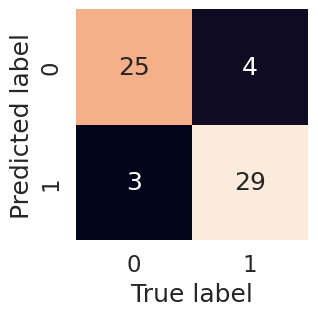

In [86]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

In [87]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [88]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [89]:
clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [91]:
# cross validated precision
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [92]:
cv_recall = cross_val_score(clf, x, y, scoring="recall", cv=5)
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [93]:
# cross validated f1-score
cv_f1 = cross_val_score(clf,x,y,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

**Feature Importance**

In [95]:
clf.fit(x_train,y_train)
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [96]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

<Axes: title={'center': 'Feature Importance'}>

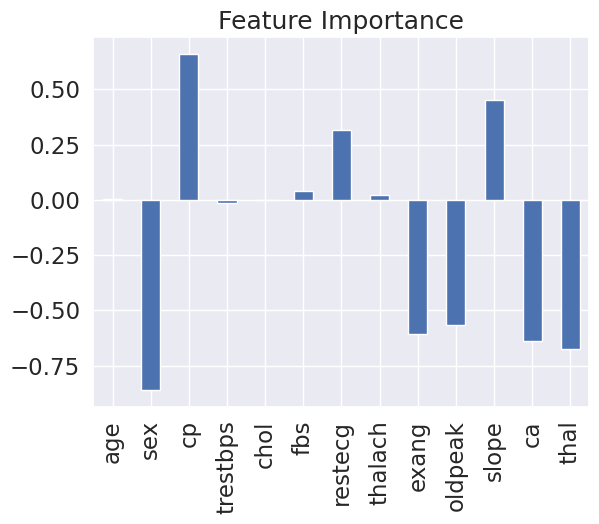

In [97]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [98]:
import pickle

In [99]:
pickle.dump(clf,open("heart_model.pkl","wb"))

In [100]:
testing_pickle = pickle.load(open("heart_model.pkl","rb"))

In [101]:
testing_pickle.score(x_test,y_test)

0.8852459016393442

In [102]:
y_preds = testing_pickle.predict(x_test)

In [103]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [104]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
